Heart Stroke Prediction

This data science project aims to predict the likelihood of an individual to get a stroke based on various health and demographic factors. I will be exploring the relationships between different features and stroke incidence, providing insights into risk factors.
The dataset used in this project contains information necessary to predict the occurrence of a stroke. Each row in the dataset represents a patient, and the dataset includes the following attributes:

1) id: Unique identifier
2) gender: "Male", "Female", or "Other"
3) age: Age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: Average glucose level in the blood
10) bmi: Body mass index
11) smoking_status: "Formerly smoked", "Never smoked", "Smokes", or "Unknown"
12) stroke: 1 if the patient had a stroke, 0 if not

This project aims to leverage machine learning techniques to build a predictive model that can identify individuals at risk of stroke based various features. 
By detecting high-risk individuals early, appropriate preventive measures can be taken to reduce the incidence and impact of stroke.
To enhance the accuracy of the stroke prediction model, the dataset will be analyzed and processed using various data science methodologies and algorithms.


In [1]:
#importing libraries
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [5]:
#Loading the dataset
stroke_data = pd.read_csv(r"C:\Users\leher gangwar\Downloads\healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
stroke_data.drop('id', axis=1, inplace=True)

DATA PREPROCESSING

In [9]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [15]:
#checking for null values
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
#replacing the missing values with the most frequent value
stroke_data['bmi'].fillna(stroke_data['bmi'].mode()[0], inplace=True)

C:\Users\leher gangwar\AppData\Local\Temp\ipykernel_11488\3186554821.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['bmi'].fillna(stroke_data['bmi'].mode()[0], inplace=True)


In [19]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check values and their count in the columns

In [21]:
print(stroke_data['ever_married'].value_counts())
print(stroke_data['work_type'].value_counts())
print(stroke_data['gender'].value_counts())
print(stroke_data['Residence_type'].value_counts())
print(stroke_data['smoking_status'].value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Replacing the values in columns with numerical values

Residence Type: Urban = 1, Rural = 0
Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
Ever_Maried : Yes = 1, No = 0
Gender : Male = 1, Female = 0, Other = 2
Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4

In [23]:
stroke_data['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
stroke_data['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
stroke_data['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
stroke_data['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
stroke_data['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

C:\Users\leher gangwar\AppData\Local\Temp\ipykernel_11488\2121504552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\leher gangwar\AppData\Local\Temp\ipykernel_11488\2121504552.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

EXPLORATORY DATA ANALYSIS

<Axes: >

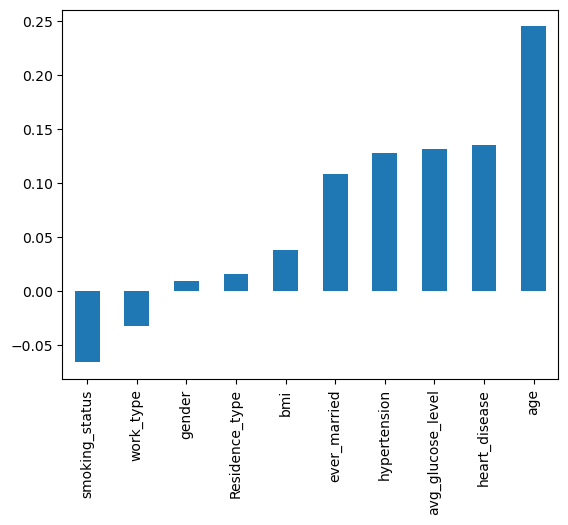

In [29]:
#finding correlation between the variables
stroke_data.corr()['stroke'][:-1].sort_values().plot(kind='bar')  ##co-relating all the features with stroke


<Axes: >

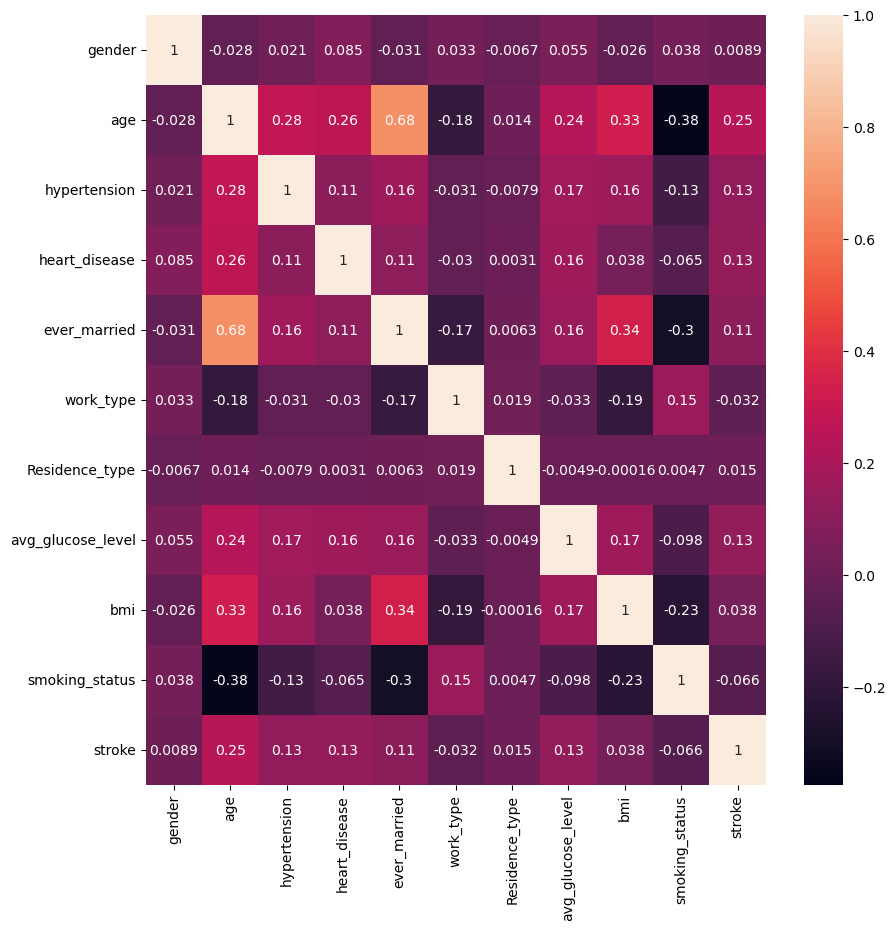

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(stroke_data.corr(), annot=True)

VISUALIZING THE DATA

C:\Users\leher gangwar\AppData\Local\Temp\ipykernel_11488\1597716075.py:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'gender', hue='gender', data = stroke_data, palette = ['#9ecda4', '#ff7f0e'], legend = False)


Text(0, 0.5, 'Count')

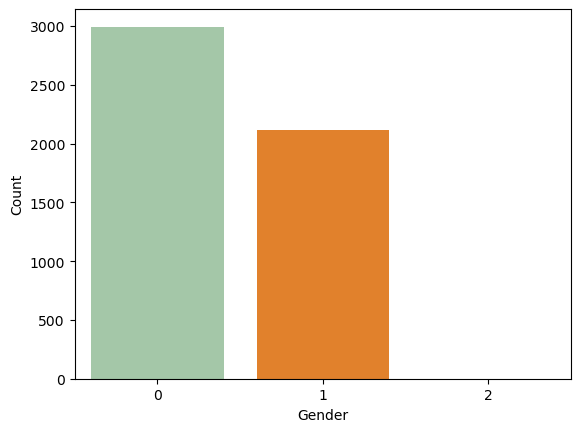

In [55]:
sns.countplot(x = 'gender', hue='gender', data = stroke_data, palette = ['#9ecda4', '#ff7f0e'], legend = False)
plt.xlabel("Gender")
plt.ylabel("Count")

<Axes: xlabel='Residence_type', ylabel='count'>

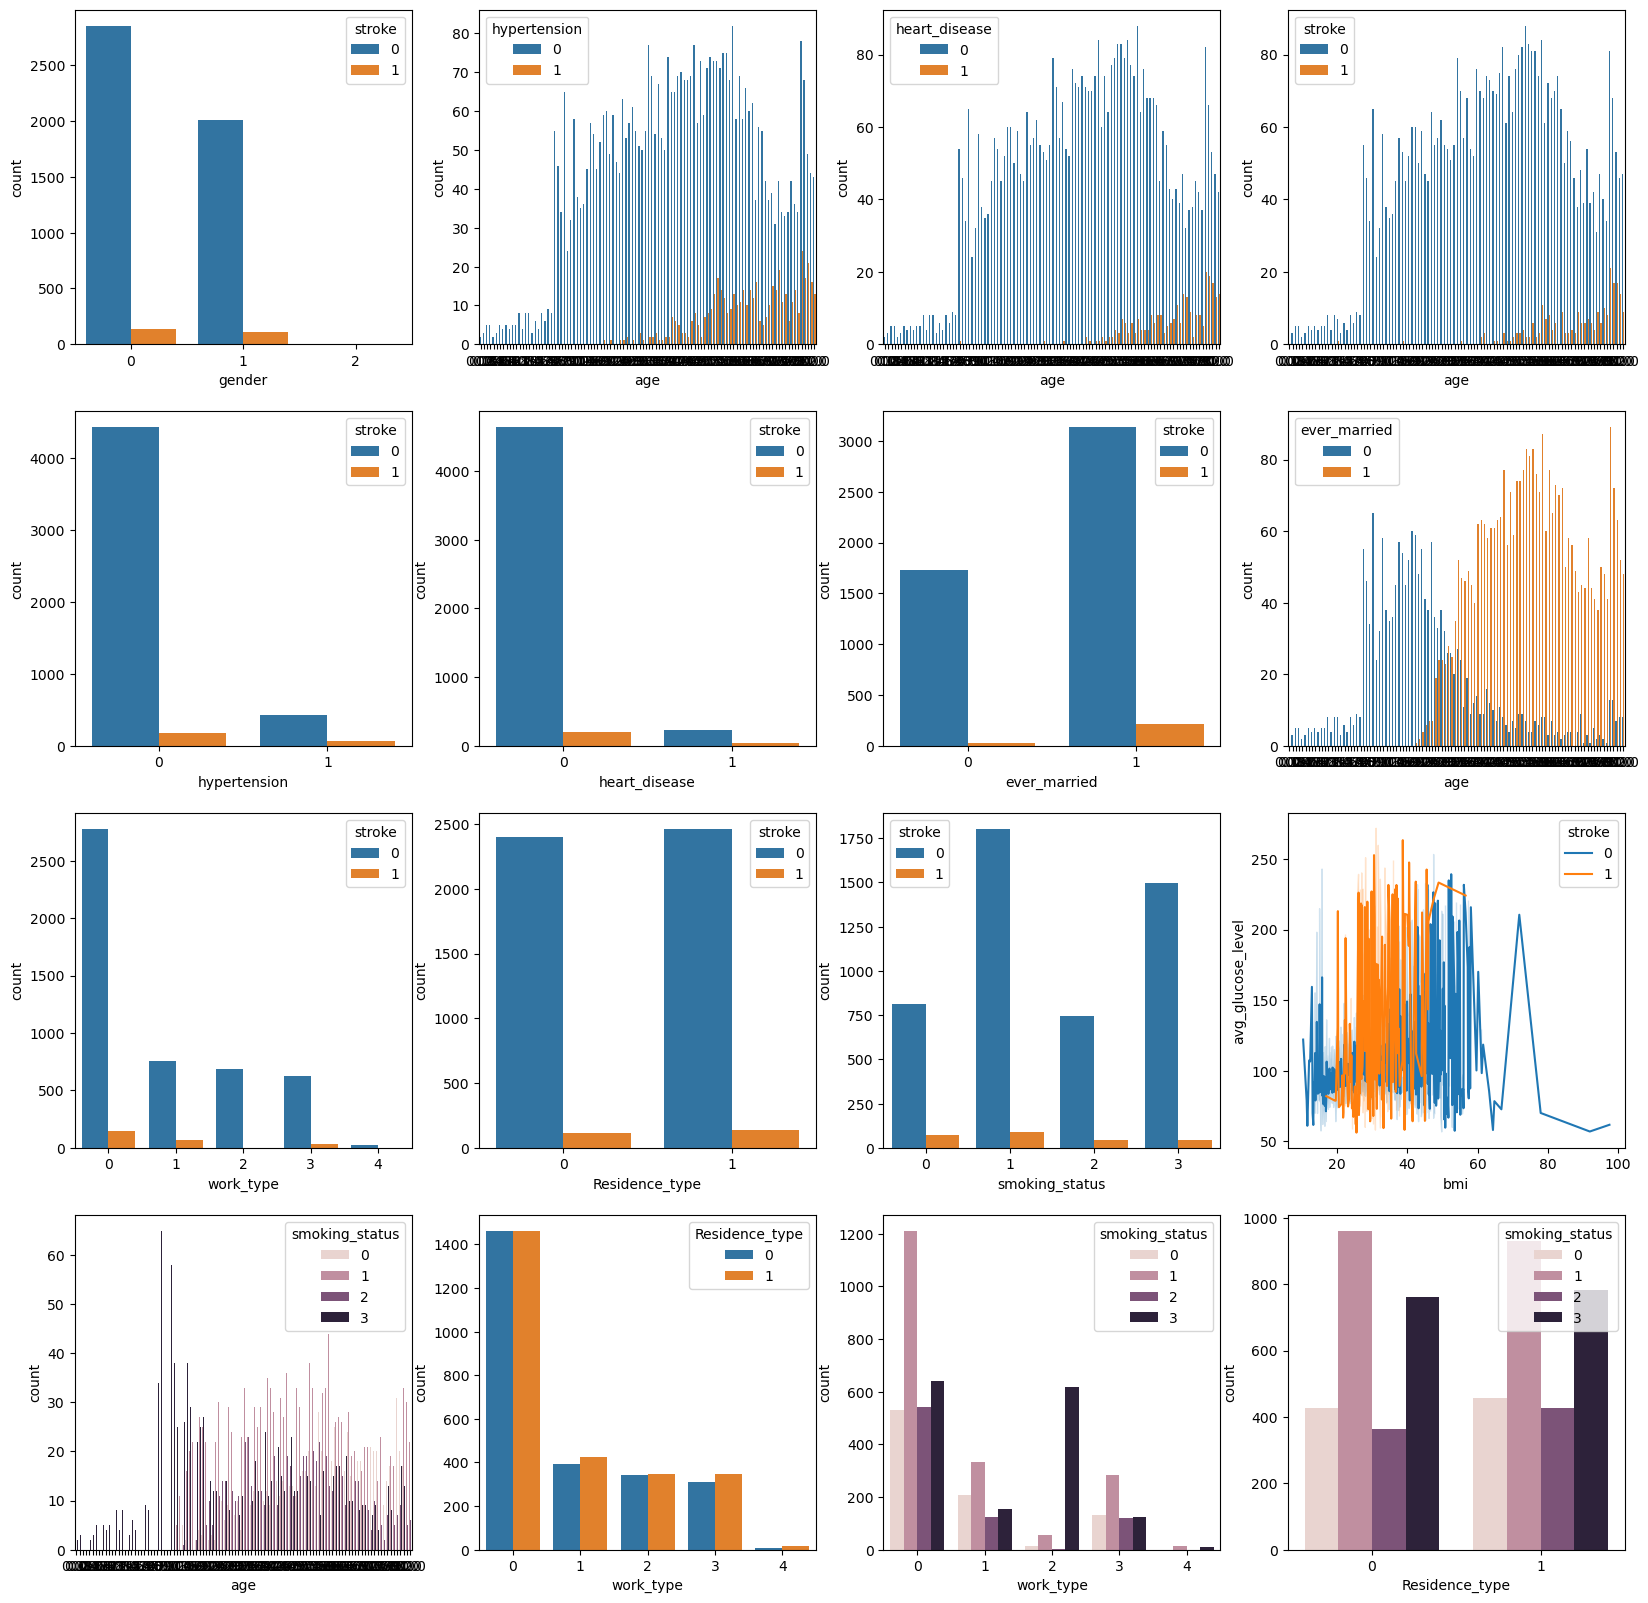

In [57]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = stroke_data,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = stroke_data,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = stroke_data,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = stroke_data,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = stroke_data,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = stroke_data,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = stroke_data,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = stroke_data,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = stroke_data,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = stroke_data,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = stroke_data,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = stroke_data,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = stroke_data,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = stroke_data,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = stroke_data,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = stroke_data,hue = 'smoking_status', ax=ax[3,3])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop('stroke', axis=1), stroke_data['stroke'], test_size=0.2, random_state=42)

In [61]:
#LOGISTIC REGRESSION
lr = LogisticRegression()
lr

LogisticRegression()

In [63]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\leher gangwar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9373776908023483

In [65]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9373776908023483

In [67]:
#SUPPORT VECTOR MACHINE(SVM)
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [69]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9393346379647749

In [71]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9393346379647749

In [73]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [75]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9197651663405088

In [77]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9197651663405088

In [79]:
#K- NEAREST NEIGHBOUR(KNN)
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [81]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9354207436399217

In [83]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9354207436399217

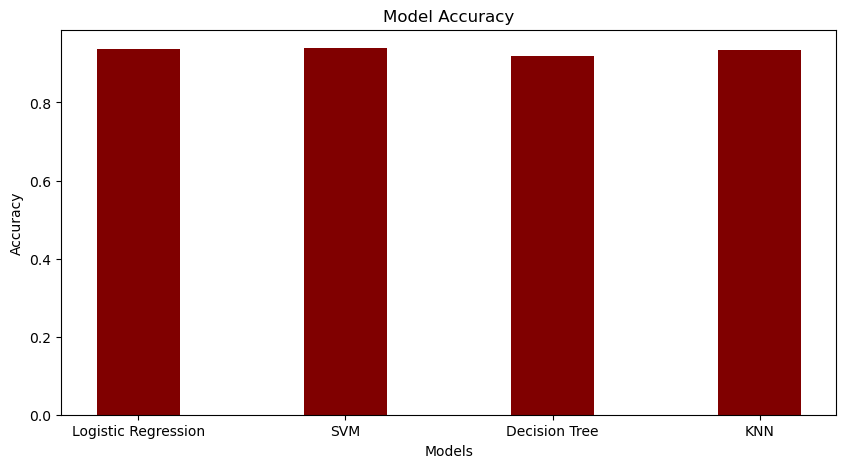

In [85]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

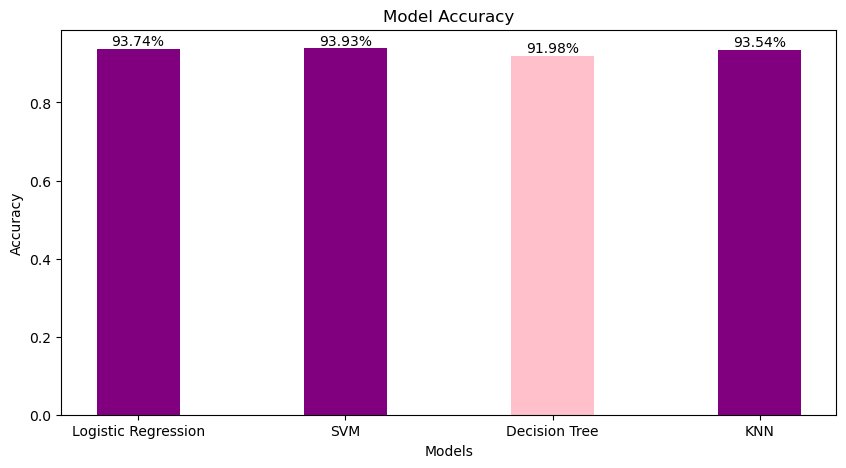

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming y_test and the predictions are defined
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy, color=['Purple','Purple','Pink', 'Purple'], width=0.4)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Annotate bars with percentage
for bar in bars:
    yval = bar.get_height()  ##retrieves the height of the current bar, which corresponds to the accuracy value for that model.
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')


plt.show()


CONCLUSION:-

With the following analysis it is clearly seen that Logistic Regression, SVM and KNN have quite similar accuracies i.e ~93.73%. The accuracy of decision tree classifier is 91.98%.
Thus, we can use any of these models to predict the heart stroke. 

